In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import tqdm

In [2]:
sys.path.append('/mnt/g/My Drive/Projects/OFC/src')
import grid
import grid_updaters
import output_statistics

In [5]:
import importlib
importlib.reload(grid)
importlib.reload(grid_updaters)


<module 'grid_updaters' from '/mnt/g/My Drive/Projects/OFC/src/grid_updaters.py'>

In [45]:
try_grid = grid.NNCoulombFrictionGrid(
    f_s=10,
	increment=0.05,
	alpha=0.2,
	n=50,
	m=50,
	boundary_size=2,
	save_every=3,
)
try_grid.run_n_steps(5000, progress=True)

In [52]:
avalanche_summary = try_grid.observables_df()

In [53]:
avalanche_summary

,number_of_iterations,avalanche_size,number_of_releases
0,0,0.0,0.0
1,0,0.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0
...,...,...,...
4995,21,138.0,67.0
4996,10,59.0,24.0
4997,4,39.0,12.0
4998,30,176.0,92.0


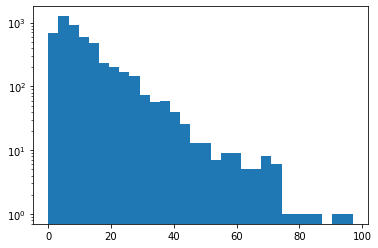

In [59]:
plt.figure()
_ = plt.hist(avalanche_summary['number_of_iterations'].values, 30)
plt.yscale('log')

In [55]:
observable = avalanche_summary['number_of_iterations'].values

In [56]:
(observable!=0).sum()

4979

In [57]:
np.argwhere(observable!=0).ravel()

array([  20,   21,   22, ..., 4997, 4998, 4999])